In [2]:
import requests

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import time
import datetime

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import numpy as np
import pandas as pd
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from scipy.stats import bernoulli

import numpy as np
from scipy import stats

# Introduction

Our project will address two research questions: 

1) What is the causal impact of PM 2.5 and Ozone level on the crude prevalence of asthma? 

2) Given the selected features, redict the crude prevalence and crude mortality rate of asthma in the future using generalized linear model.

We will mainly be using three datasets: 

1) Annual State-Level U.S. Chronic Disease Indicators filtered for asthma 

2) Modified PM2.5 dataset 

3) Modified ozone dataset 

(We computed the daily mean PM2.5 and ozone level for each state due to the large size of the two datasets)

In [3]:
asthma = pd.read_csv('Asthma.csv')
asthma.head(5)

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning:

Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.



,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2012,2012,AL,Alabama,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,1,AST,AST4_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
1,2014,2014,AL,Alabama,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,1,AST,AST4_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
2,2011,2011,AZ,Arizona,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,4,AST,AST4_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
3,2015,2015,CT,Connecticut,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,9,AST,AST4_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2011,2011,FL,Florida,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,12,AST,AST4_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN


In [4]:
pm25 = pd.read_csv('PM25.csv').drop('Unnamed: 0', axis = 1)
pm25.head(5)

,statefip,01JAN2011,02JAN2011,03JAN2011,04JAN2011,05JAN2011,06JAN2011,07JAN2011,08JAN2011,09JAN2011,...,22DEC2014,23DEC2014,24DEC2014,25DEC2014,26DEC2014,27DEC2014,28DEC2014,29DEC2014,30DEC2014,31DEC2014
0,1,5.196290,4.984104,7.209600,14.935756,13.690596,8.585039,5.775294,5.281323,5.653868,...,6.277790,4.574800,4.386800,6.835787,10.125804,8.777215,5.365212,6.648250,8.164014,10.379025
1,4,8.827295,7.360635,12.533566,11.775343,10.416504,10.179782,13.626992,9.685872,11.871241,...,15.854941,9.668950,9.149272,8.300927,7.769705,12.176465,11.554488,14.450957,10.587868,9.241211
2,5,5.786716,7.738383,8.606869,11.491568,12.038085,8.903985,5.570338,4.409569,5.063505,...,9.685457,5.797382,5.141571,4.235675,7.013927,5.985645,6.463000,8.268514,10.546440,9.648933
3,6,13.559603,8.105638,7.545573,9.488456,10.519056,12.612504,19.867717,16.772288,14.125612,...,11.942154,7.795916,8.594198,5.446916,5.797357,11.192144,14.167456,14.964028,10.647488,11.708086
4,8,3.949587,5.036296,8.523260,14.477241,4.653650,7.191430,7.362693,14.661273,7.734357,...,3.371333,4.931956,6.957509,3.884519,5.561388,8.712206,13.681786,10.666739,7.372589,13.418500


In [5]:
ozone = pd.read_csv('ozone.csv').drop('Unnamed: 0', axis = 1)
ozone.head(5)

,statefip,01JAN2011,02JAN2011,03JAN2011,04JAN2011,05JAN2011,06JAN2011,07JAN2011,08JAN2011,09JAN2011,...,22DEC2014,23DEC2014,24DEC2014,25DEC2014,26DEC2014,27DEC2014,28DEC2014,29DEC2014,30DEC2014,31DEC2014
0,1,32.721949,34.568758,30.375864,34.251780,25.669446,35.428277,42.567707,37.360915,29.332703,...,18.379176,26.374789,27.970030,24.502318,29.265682,26.539294,21.010491,13.935375,20.869850,20.861829
1,4,37.600710,36.208419,28.965546,22.845798,24.252316,21.691751,27.932608,32.126367,38.859366,...,30.941900,41.052629,35.428706,35.638700,33.114273,29.577865,30.148626,30.046606,31.062371,30.077946
2,5,30.239673,34.037387,34.557988,31.986139,33.764155,39.655212,35.805370,34.693654,27.113124,...,18.632721,26.653000,16.930287,33.680957,24.719975,19.922840,15.101408,20.903627,25.459039,23.421275
3,6,32.563569,28.175180,23.692732,24.940009,20.267972,19.010336,16.436324,22.489915,28.328533,...,19.186271,19.241213,30.206364,36.871303,32.910782,30.952254,29.631145,29.022493,33.305325,32.842572
4,8,37.797404,36.801446,36.713041,41.866961,42.656211,38.958352,33.559118,23.684557,37.000746,...,35.381818,39.690000,28.191967,33.211362,29.620425,31.601164,28.668236,28.348465,26.475895,29.747821


# Data Cleaning

For data cleaning, we first loaded individual datasets and dropped those containing N/A values. We selected columns relevant to our reasearch question, and merged all 3 datasets into one on Year and StateID.\
Since we dropped various rows containing N/A values, the data used to generate models as well as make predictions may not be as accurate. 

### 1) Asthma Dataset

In [6]:
asthma['Question'].value_counts()

Asthma mortality rate                                                                      9816
Current asthma prevalence among adults aged >= 18 years                                    7830
Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma       7830
Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma       7830
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma    7830
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma    7830
Hospitalizations for asthma                                                                6516
Emergency department visit rate for asthma                                                 6312
Asthma prevalence among women aged 18-44 years                                             2925
Name: Question, dtype: int64

Among the 9 questions addressed in the asthma dataset, we will only explore 'asthma mortality rate' and 'current asthma prevalence among adults aged >= 18 years' for our project. And we will only use data that are between 2011-2014 to match the time frame in PM2.5 and ozone datasets. Moreoover, we will only use crude rate and crude prevalence in our analysis.

#### Asthma mortality rate (crude rate)

In [7]:
mortality = asthma[asthma['Question'] == 'Asthma mortality rate']
# Select data from 2011-2014
mortality = mortality[(mortality['YearStart'] >= 2011) & (mortality['YearEnd'] <= 2014) & (mortality['DataValueTypeID'] == 'CRDRATE')]
selected_columns = ['YearStart', 'LocationDesc', 'LocationID', 'DataValue', 'StratificationCategoryID1', 'StratificationID1']
mortality_selected = mortality[selected_columns]
mortality_selected = mortality_selected.rename(columns={'YearStart':'Year','LocationDesc':'State', 'LocationID': 'StateID',
                                                'DataValue':'Cases_per_million', 'StratificationCategoryID1':'StratificationCategory',
                                                'StratificationID1':'Stratification'})
# Drop NA rows
mortality_cleaned = mortality_selected.dropna()
mortality_cleaned.head(5)


,Year,State,StateID,Cases_per_million,StratificationCategory,Stratification
49,2013,Florida,12,9.0,RACE,WHT
51,2013,Illinois,17,17.1,GENDER,GENF
74,2013,Alabama,1,8.7,OVERALL,OVR
83,2011,Colorado,8,8.2,OVERALL,OVR
126,2011,Colorado,8,9.4,RACE,WHT


#### Current asthma prevalence among adults aged >= 18 years (crude rate)

In [8]:
prevalence = asthma[asthma['Question'] == 'Current asthma prevalence among adults aged >= 18 years']
# Select data from 2011-2014
prevalence = prevalence[(prevalence['YearStart'] >= 2011) & (prevalence['YearEnd'] <= 2014) & (prevalence['DataValueTypeID'] == 'CRDPREV')]
prevalence_selected = prevalence[selected_columns]
prevalence_selected = prevalence_selected. rename(columns={'YearStart':'Year','LocationDesc':'State', 'LocationID': 'StateID',
                                                'DataValue':'Prevalence', 'StratificationCategoryID1':'StratificationCategory',
                                                'StratificationID1':'Stratification'})
# Drop NA rows
prevalence_cleaned = prevalence_selected.dropna()
prevalence_cleaned.head(5)

,Year,State,StateID,Prevalence,StratificationCategory,Stratification
22650,2012,Colorado,8,7.1,GENDER,GENM
22658,2011,Puerto Rico,72,13.2,GENDER,GENF
22659,2014,New Mexico,35,7.4,GENDER,GENM
22662,2011,Missouri,29,11.5,GENDER,GENF
22663,2011,Montana,30,11.6,GENDER,GENF


### 2) PM2.5 & Ozone

In [9]:
pm25_cleaned = pm25.melt(id_vars='statefip')
pm25_cleaned = pm25_cleaned.rename(columns={'statefip':'StateID','variable':'Date', 'value': 'PM2.5'})
# Add a year column
pm25_cleaned['Year'] = pm25_cleaned['Date'].str[-4:]
# Group PM2.5 by year and take the mean
pm25_grouped = pm25_cleaned.groupby(["Year", "StateID"]).mean().reset_index()
pm25_grouped.head(5)

,Year,StateID,PM2.5
0,2011,1,10.722394
1,2011,4,7.957158
2,2011,5,10.607418
3,2011,6,10.424960
4,2011,8,6.438329


In [10]:
ozone_cleaned = ozone.melt(id_vars='statefip')
ozone_cleaned = ozone_cleaned.rename(columns={'statefip':'StateID','variable':'Date', 'value': 'Ozone'})
# Add a year column
ozone_cleaned['Year'] = ozone_cleaned['Date'].str[-4:]
# Group ozone level by year and take the mean
ozone_grouped = ozone_cleaned.groupby(["Year", "StateID"]).mean().reset_index()
ozone_grouped.head(5)

,Year,StateID,Ozone
0,2011,1,41.170865
1,2011,4,46.998399
2,2011,5,41.012629
3,2011,6,39.981360
4,2011,8,47.043940


In [11]:
# Merge pm25_grouped with ozone_grouped
pm25_ozone = pd.merge(pm25_grouped, ozone_grouped, how='left', on=['Year','StateID'])
pm25_ozone.head(5)

,Year,StateID,PM2.5,Ozone
0,2011,1,10.722394,41.170865
1,2011,4,7.957158,46.998399
2,2011,5,10.607418,41.012629
3,2011,6,10.424960,39.981360
4,2011,8,6.438329,47.043940


### 3) Merge asthma, PM2.5 and ozone datasets together

In [12]:
# Convert 'Year' column in pm25_ozone to float
pm25_ozone['Year'] = pm25_ozone['Year'].apply(lambda x: float(x))
mortality_airquality = pd.merge(mortality_cleaned, pm25_ozone, how='left', on=['Year','StateID'], )
# Drop NA rows
mortality_final = mortality_airquality.dropna()
mortality_final.head(5)

,Year,State,StateID,Cases_per_million,StratificationCategory,Stratification,PM2.5,Ozone
0,2013,Florida,12,9.0,RACE,WHT,6.742281,36.211734
1,2013,Illinois,17,17.1,GENDER,GENF,10.812928,35.851500
2,2013,Alabama,1,8.7,OVERALL,OVR,9.992244,36.892838
3,2011,Colorado,8,8.2,OVERALL,OVR,6.438329,47.043940
4,2011,Colorado,8,9.4,RACE,WHT,6.438329,47.043940


In [13]:
prevalence_airquality = pd.merge(prevalence_cleaned, pm25_ozone, how='left', on=['Year','StateID'])
# Drop NA rows
prevalence_final = prevalence_airquality.dropna()
prevalence_final.head(5)

,Year,State,StateID,Prevalence,StratificationCategory,Stratification,PM2.5,Ozone
0,2012,Colorado,8,7.1,GENDER,GENM,6.906790,47.597103
2,2014,New Mexico,35,7.4,GENDER,GENM,6.728881,43.070311
3,2011,Missouri,29,11.5,GENDER,GENF,10.122351,40.398751
4,2011,Montana,30,11.6,GENDER,GENF,6.424145,39.542425
5,2012,Kentucky,21,8.4,GENDER,GENM,9.935710,42.056297


# EDA

1) Asthma: Gender

Text(0.5, 1.0, 'Prevalence VS Gender')

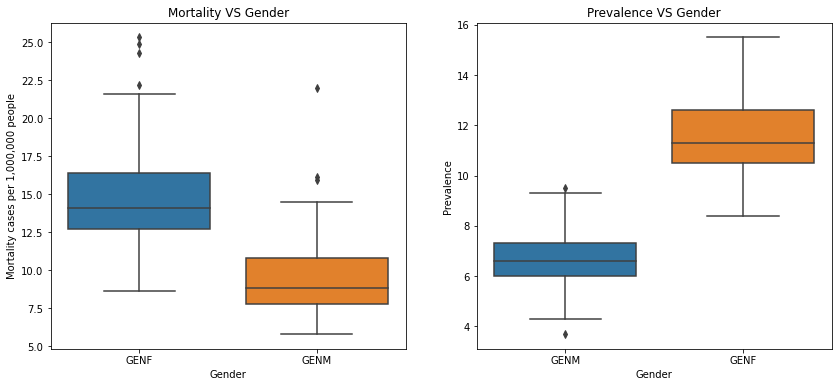

In [14]:
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
mortality_gender = mortality_final[mortality_final['StratificationCategory'] == 'GENDER']
sns.boxplot(x = 'Stratification', y = 'Cases_per_million', data = mortality_gender)
plt.xlabel('Gender')
plt.ylabel('Mortality cases per 1,000,000 people')
plt.title('Mortality VS Gender')

plt.subplot(1, 2, 2)
prevalence_gender = prevalence_final[prevalence_final['StratificationCategory'] == 'GENDER']
sns.boxplot(x = 'Stratification', y = 'Prevalence', data = prevalence_gender)
plt.xlabel('Gender')
plt.title('Prevalence VS Gender')

From boxplots generated between mortality and prevalence vs gender, We observed female having both higher mortality rate and prevalence for asthma. We suspect a correlation between gender and asthma prevalence where female are more susceptible to the disease.

Text(0.5, 1.0, 'Mortality rate for each year')

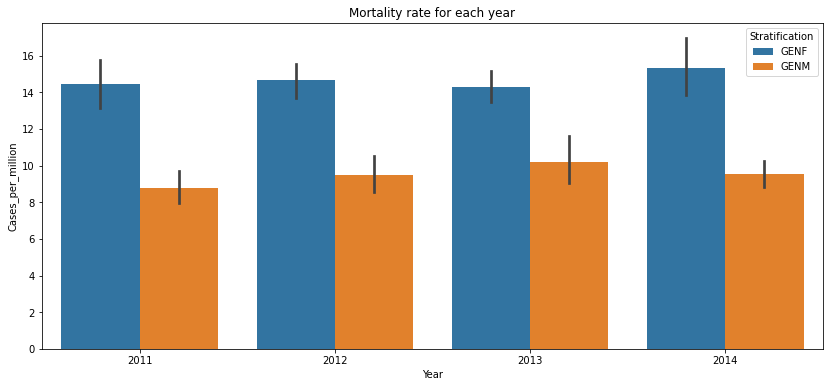

In [15]:
plt.figure(figsize = (14, 6))
sns.barplot(x = 'Year', y = 'Cases_per_million', hue = 'Stratification', data = mortality_gender)
plt.title('Mortality rate for each year')

In examining the influence of year on asthma motality rate, we don't see obvious difference of pattern with varying years hence it is safe reason that year has little or no confounding impact on gender's casual relationship with mortality rate.

Text(0.5, 1.0, 'Mortality rate for each year')

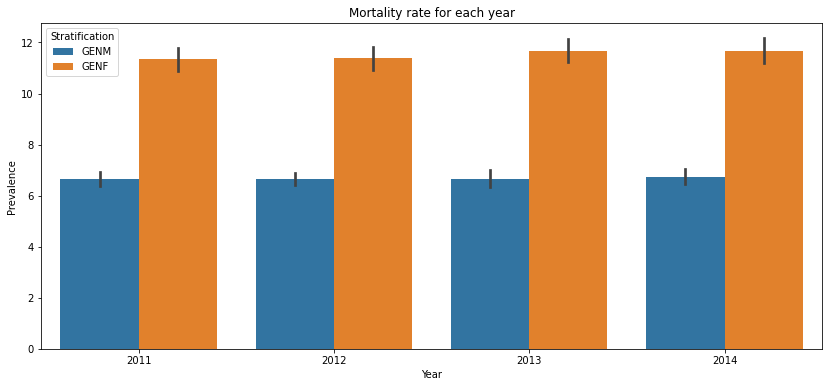

In [16]:
plt.figure(figsize = (14, 6))
prevalence_gender = prevalence_final[prevalence_final['StratificationCategory'] == 'GENDER']
sns.barplot(x = 'Year', y = 'Prevalence', hue = 'Stratification', data = prevalence_gender)
plt.title('Mortality rate for each year')

2) Asthma: Race

Text(0.5, 1.0, 'Prevalence VS Race')

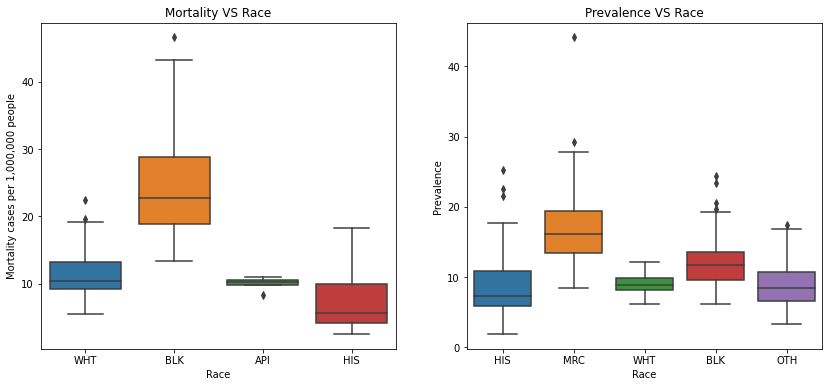

In [17]:
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
mortality_race = mortality_final[mortality_final['StratificationCategory'] == 'RACE']
sns.boxplot(x = 'Stratification', y = 'Cases_per_million', data = mortality_race)
plt.xlabel('Race')
plt.ylabel('Mortality cases per 1,000,000 people')
plt.title('Mortality VS Race')

plt.subplot(1, 2, 2)
prevalence_race = prevalence_final[prevalence_final['StratificationCategory'] == 'RACE']
sns.boxplot(x = 'Stratification', y = 'Prevalence', data = prevalence_race)
plt.xlabel('Race')
plt.title('Prevalence VS Race')

When examining the boxplot between race and mortality rate, we see black (BLK) having the highest upperbound as well as outlier values. Black (BLK) has the smallest interquantile range while asian and pacific islanders (API) have the largest.\
When examining the boxplot between prevalance and race, we see multiracial (MRC) having the highest upperbound and outlier.\
One thing to note is that gender and race has no data reflecting their potential relationship hence when modeling, we either separate them or choose one.

3) Asthma: location/state

<AxesSubplot:xlabel='StateID', ylabel='Prevalence'>

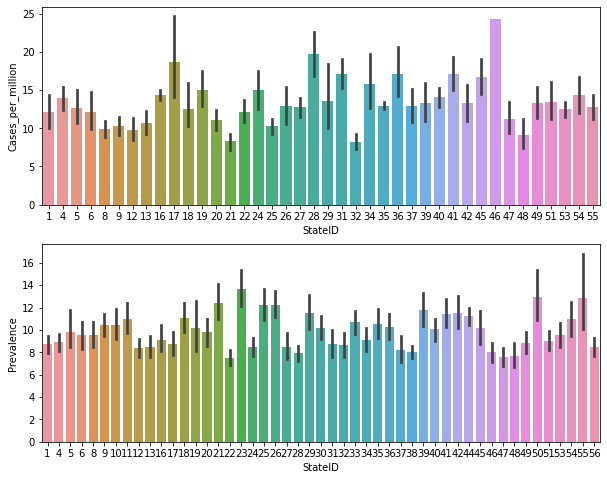

In [18]:
### Add into abbreviations
plt.figure(figsize = (10, 8))

plt.subplot(2, 1, 1)
sns.barplot(x = 'StateID', y = 'Cases_per_million', data = mortality_final)

plt.subplot(2, 1, 2)
sns.barplot(x = 'StateID', y = 'Prevalence', data = prevalence_final)

We see varying mortality/prevalence of asthma across states, thus we want to include state as a confounding variable when predicting future pm2.5/ozone level on asthma prevalence/mortality.

In [19]:
new = prevalence_race.groupby(['State','Stratification']).size().to_frame().reset_index().pivot(index='State', columns='Stratification', values=0).fillna(0)

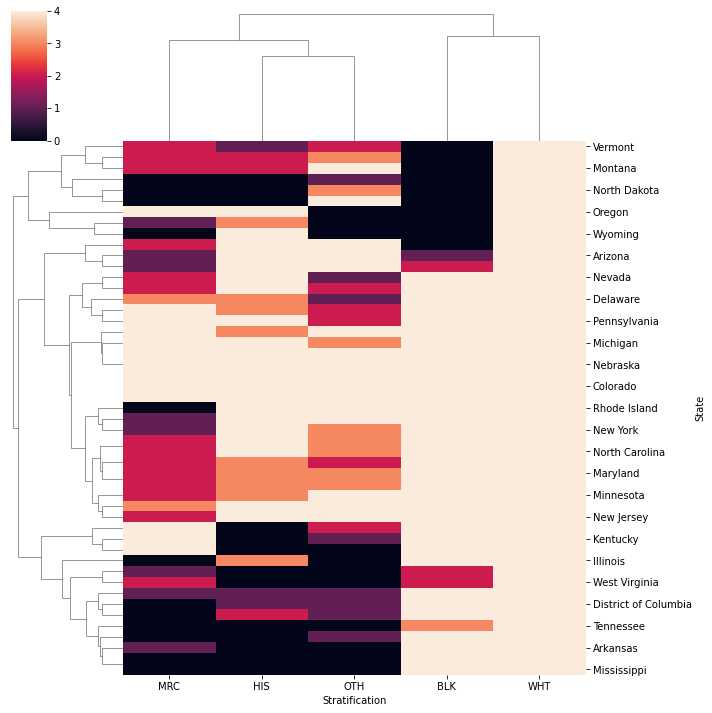

In [20]:
sns.clustermap(new)

From the clustered heatmap above, we see unequal distribution of race along different states. Thus, we are interested in examining the relationship between race and geography, which may both serve as a confounding variable to asthma prevalence/mortality.

4) PM2.5 and ozone

<AxesSubplot:xlabel='PM2.5', ylabel='Ozone'>

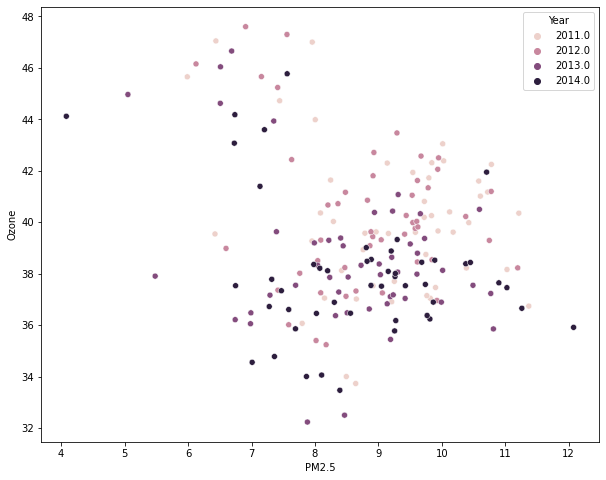

In [21]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='PM2.5', y='Ozone', data=pm25_ozone, hue='Year')

When examining the scatterplot between Ozone and pm2.5 level, we see no distinct relationship as shown by the ramdomized pattern. Thus, when evaluating their effects on prevalence of asthma, it is reasonable that we separate them into distinct random variables.

5) Asthma, PM2.5 and ozone

Text(0.5, 1.0, 'Prevalence VS Ozone level')

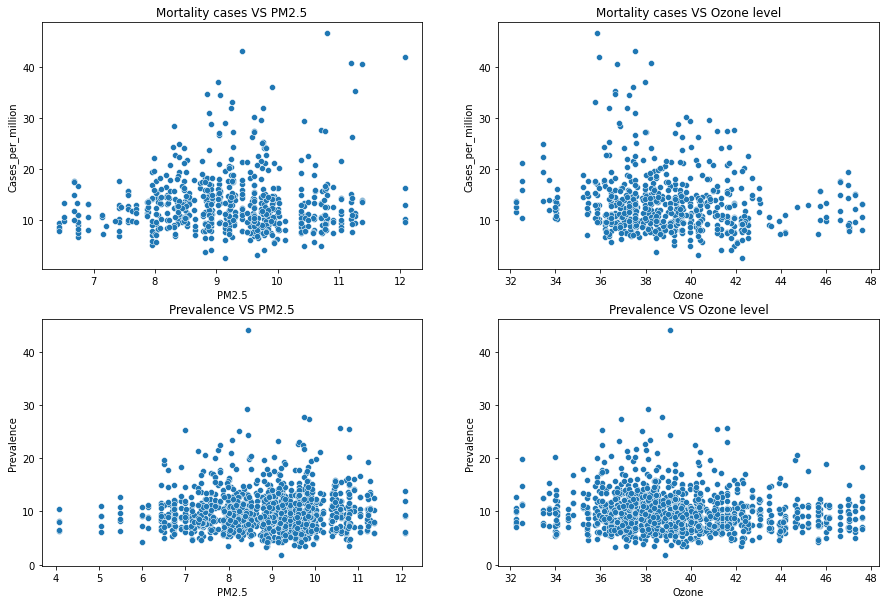

In [22]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='PM2.5', y='Cases_per_million', data=mortality_final)
plt.title('Mortality cases VS PM2.5')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Ozone', y='Cases_per_million', data=mortality_final)
plt.title('Mortality cases VS Ozone level')

plt.subplot(2, 2, 3)
sns.scatterplot(x='PM2.5', y='Prevalence', data=prevalence_final)
plt.title('Prevalence VS PM2.5')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Ozone', y='Prevalence', data=prevalence_final)
plt.title('Prevalence VS Ozone level')

When examining the scatter plot above, we don't see clear pattern between prevalence of asthma/mortality rate versus onzone/pm2.5. However, there may exist various confounding variables that influence the overall trend, for example location(state), year, as well as gender and race.

In [23]:
prevalence_gender

,Year,State,StateID,Prevalence,StratificationCategory,Stratification,PM2.5,Ozone
0,2012,Colorado,8,7.1,GENDER,GENM,6.906790,47.597103
2,2014,New Mexico,35,7.4,GENDER,GENM,6.728881,43.070311
3,2011,Missouri,29,11.5,GENDER,GENF,10.122351,40.398751
4,2011,Montana,30,11.6,GENDER,GENF,6.424145,39.542425
5,2012,Kentucky,21,8.4,GENDER,GENM,9.935710,42.056297
...,...,...,...,...,...,...,...,...
1330,2012,Oklahoma,40,12.7,GENDER,GENF,8.929216,42.708452
1336,2013,Ohio,39,6.8,GENDER,GENM,10.490872,37.547077
1339,2013,Kansas,20,10.9,GENDER,GENF,8.937908,40.379074
1342,2011,New York,36,12.3,GENDER,GENF,9.900638,37.461733


<AxesSubplot:xlabel='PM2.5', ylabel='Prevalence'>

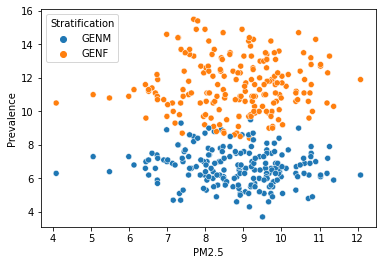

In [24]:
sns.scatterplot(data=prevalence_gender, x = 'PM2.5', y = 'Prevalence', hue='Stratification')

<AxesSubplot:xlabel='Ozone', ylabel='Prevalence'>

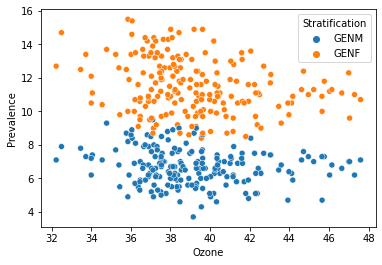

In [25]:
sns.scatterplot(data=prevalence_gender, x = 'Ozone', y = 'Prevalence', hue='Stratification')

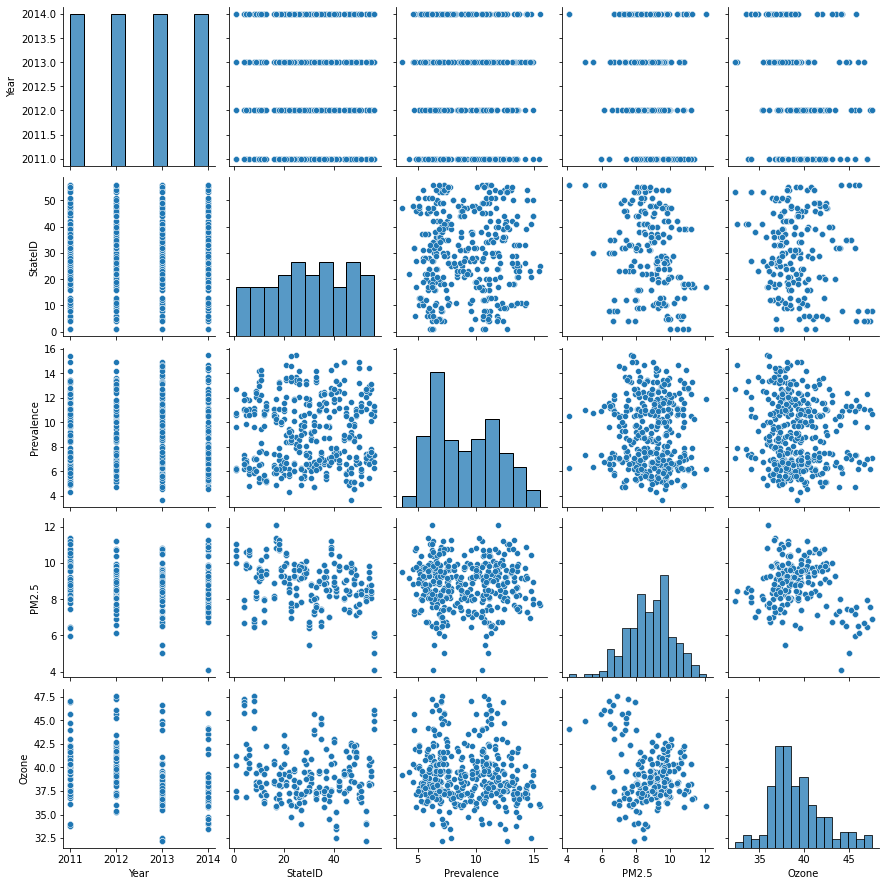

In [26]:
sns.pairplot(prevalence_gender)

# Research Question 1: What's the causal impact of ozone level on asthma crude prevalence? (use race/gender as the control variables)

(Due to the limitation of the asthma data set, we can't control for race and gender at the same time for our model, so we will control for race and gender seperately in our analysis)

### Model Setup
- Treatment variable Z: Ozone level
- Outcome variable Y: Crude Prevalence of Asthma
- Confounders: gender/race, PM2.5
- We assume that the unconfoundedness assumption holds. In other words, gender/race and PM2.5 are the only confounders in this problem.
- There is no collider in the dataset


### Here are some methods we would use in this section.

In [27]:
### This function below is adapted from Lab7
def fit_OLS_model(df, target_variable, explanatory_variables, intercept = False):
    """
    Fits an OLS model from data.
    
    Inputs:
        df: pandas DataFrame
        target_variable: string, name of the target variable
        explanatory_variables: list of strings, names of the explanatory variables
        intercept: bool, if True add intercept term
    Outputs:
        fitted_model: model containing OLS regression results
    """
    
    target = df[target_variable]
    inputs = df[explanatory_variables]
    if intercept:
        inputs = sm.add_constant(inputs)
    
    fitted_model = sm.OLS(target, inputs).fit()
    return(fitted_model)

In [28]:
### This function below is adapted from Lab8
def mean_squared_error(true_vals, predicted_vals):
    """
    Return the mean squared error
    
    Inputs:
        true_vals: array of true labels
        predicted_vals: array labels predicted from the data
    Output:
        float, mean squared error of the predicted values
    """
    return np.mean((true_vals - predicted_vals) ** 2)

In [29]:
def encode_and_bind(original_dataframe, feature_to_encode):
    """
    One-hot encoding for deature
    """
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

## Part A. We first try controlling for confounding variables by fitting a GLM model.

First, let's look at the relationship between prevalence Ozone, and PM2.5 directly.\
The model we fit is in the following form: Prevalence = $\alpha$ + $\tau*Z + b*PM2.5$


In [30]:
model_prevalence_pm = fit_OLS_model(prevalence_final, 'Prevalence', ['Ozone'], intercept = True)
print(model_prevalence_pm.summary())

                            OLS Regression Results                            
Dep. Variable:             Prevalence   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.28
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           0.000809
Time:                        22:54:58   Log-Likelihood:                -3387.2
No. Observations:                1252   AIC:                             6778.
Df Residuals:                    1250   BIC:                             6789.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4428      1.349     10.710      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



This is not a good model since its log-likelihood is far from 0 and its coefficient on PM2.5 is not statistically significant. 

From previous EDA part, we know that ...
- "When examining the boxplot between prevalance and race, we see multiracial (MRC) having the highest upperbound and outlier."
- "We see varying crude prevalence of asthma across states." 
 
Thus, we draw a directed acyclic graph (DAG) to capture the casual relationship between variables.

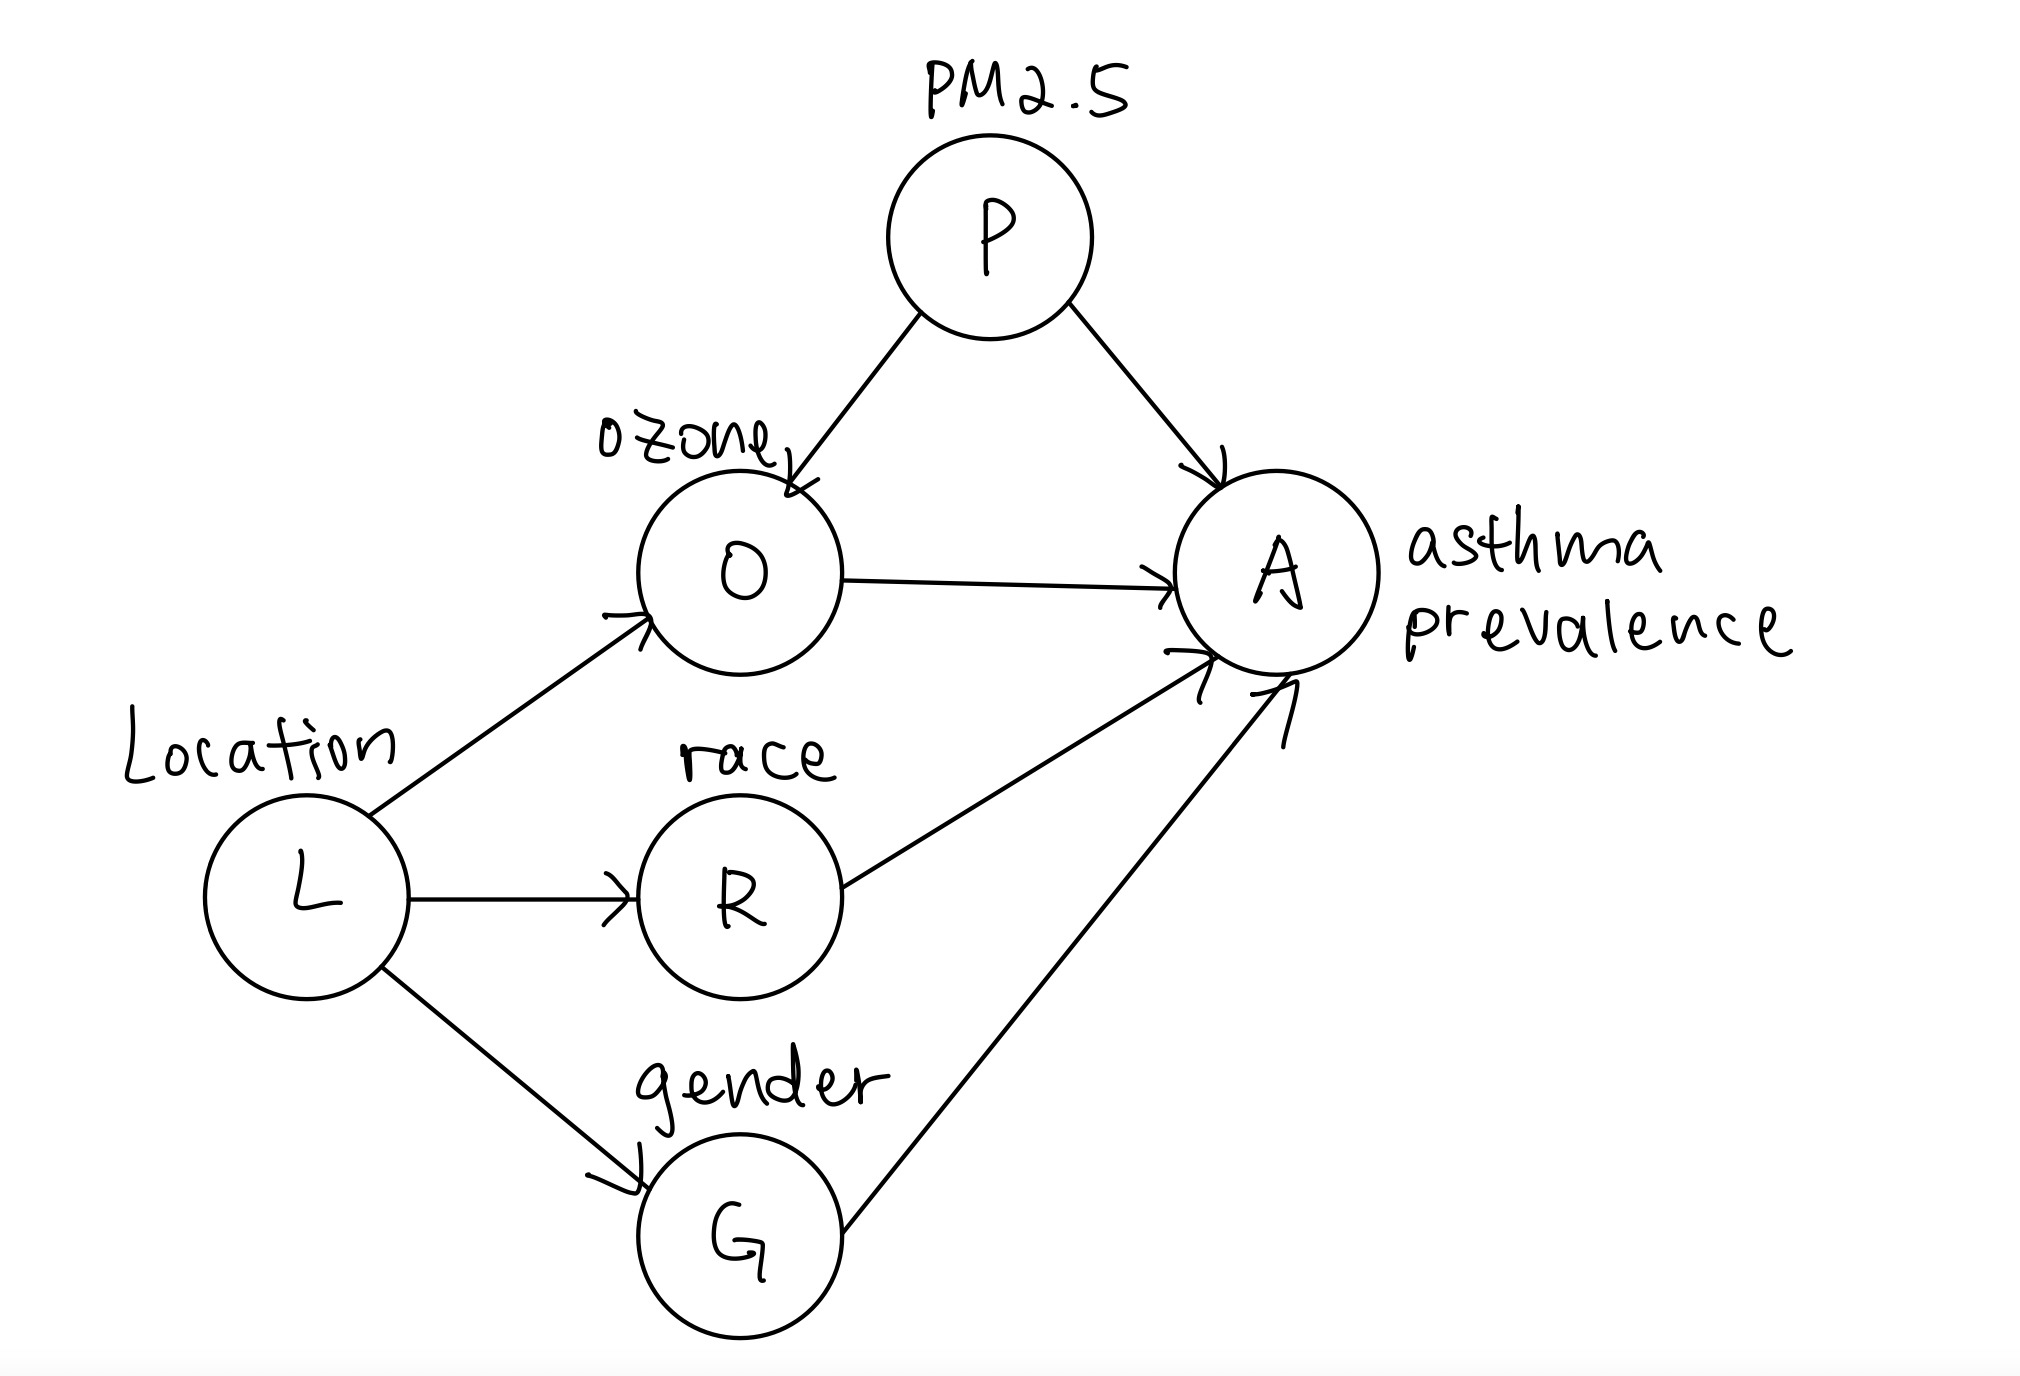

Here we see that both race and gender act as confounding variables for asthma prevalence. We want to control for both. However, since race and gender are mutually exclusive, we fit separate linear regression.
Thus, we examine the effect of PM2.5 on asthma prevalence by controlling for either race or gender.

### a) We start by first conducting one-hot encoding on binary variables

In [31]:
# One-hot encoding for race
prevalence_race_onehot = encode_and_bind(prevalence_race, 'Stratification')
prevalence_race_onehot = prevalence_race_onehot.rename(columns={'Stratification_BLK':'BLK','Stratification_HIS':'HIS',
                                                'Stratification_MRC':'MRC', 'Stratification_OTH':'OTH',
                                                'Stratification_WHT':'WHT'})
prevalence_race_onehot.head(5)

,Year,State,StateID,Prevalence,StratificationCategory,PM2.5,Ozone,BLK,HIS,MRC,OTH,WHT
19,2011,Arizona,4,6.9,RACE,7.957158,46.998399,0,1,0,0,0
20,2012,Colorado,8,12.0,RACE,6.906790,47.597103,0,0,1,0,0
22,2011,Colorado,8,6.6,RACE,6.438329,47.043940,0,1,0,0,0
23,2014,Arkansas,5,8.7,RACE,9.865337,36.892805,0,0,0,0,1
29,2013,California,6,12.0,RACE,10.592506,40.498894,1,0,0,0,0


In [32]:
# One-hot encoding for gender
prevalence_gender_onehot = encode_and_bind(prevalence_gender, 'Stratification')
prevalence_gender_onehot = prevalence_gender_onehot.rename(columns={'Stratification_GENF':'Female','Stratification_GENM':'Male'})
prevalence_gender_onehot.head(5)

,Year,State,StateID,Prevalence,StratificationCategory,PM2.5,Ozone,Female,Male
0,2012,Colorado,8,7.1,GENDER,6.906790,47.597103,0,1
2,2014,New Mexico,35,7.4,GENDER,6.728881,43.070311,0,1
3,2011,Missouri,29,11.5,GENDER,10.122351,40.398751,1,0
4,2011,Montana,30,11.6,GENDER,6.424145,39.542425,1,0
5,2012,Kentucky,21,8.4,GENDER,9.935710,42.056297,0,1


### b) We now fit the linear regression models
Since we have panel data, we want to omit variable BLK, and Male to prevent perfect multicollinearity

#### i) We examine the casual effect of Ozone on crude asthma prevalence by controlling for race and PM2.5

The model is in the following form: Prevalence = $\alpha$ + $\tau*Z + b*PM2.5 + c*HIS + d*MRC + e*OTH + f*WHT$

In [33]:
# Omitting BLK variable (for panel data)
model_prevalence_pm_race = fit_OLS_model(prevalence_race_onehot, 'Prevalence', ['Ozone','PM2.5','HIS', 'MRC', 'OTH', 'WHT'], intercept = True)
print(model_prevalence_pm_race.summary())

                            OLS Regression Results                            
Dep. Variable:             Prevalence   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     87.73
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           1.21e-80
Time:                        22:54:58   Log-Likelihood:                -1721.1
No. Observations:                 664   AIC:                             3456.
Df Residuals:                     657   BIC:                             3488.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9620      2.128      7.972      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [34]:
model_prevalence_pm_race_no_intercept = fit_OLS_model(prevalence_race_onehot, 'Prevalence', ['Ozone',"PM2.5",'HIS', 'MRC', 'OTH', 'WHT'])

In [35]:
model_prevalence_pm_race_predicted = model_prevalence_pm_race_no_intercept.predict(prevalence_race_onehot[['Ozone',"PM2.5",'HIS','MRC','OTH','WHT']]).values
err = mean_squared_error(prevalence_race_onehot['Prevalence'].values, model_prevalence_pm_race_predicted)
err

11.455482199524543

We see the model has a log-likelihood closer to 0 compared to the previous model.

#### ii) We examine the casual effect of Ozone on crude asthma prevalence by controlling for gender and PM2.5

The model is in the following form: Prevalence = $\alpha$ + $\tau*Z + b*PM2.5 + c*Female$

In [36]:
model_prevalence_pm_gender = fit_OLS_model(prevalence_gender_onehot, 'Prevalence', ['Ozone','PM2.5', 'Female'], intercept = True)
print(model_prevalence_pm_gender.summary())

                            OLS Regression Results                            
Dep. Variable:             Prevalence   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     431.6
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          3.39e-123
Time:                        22:54:58   Log-Likelihood:                -669.50
No. Observations:                 392   AIC:                             1347.
Df Residuals:                     388   BIC:                             1363.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4848      1.130     10.162      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



The Log-likelihood is even closer to 0. And the coefficient of Ozone is statistically significant in both linear regression models with a p-value less than 0.05.

**Result:** There is casual relationship between ozone and crude prevalence rate of asthma. Both model suggest that one unit increase in the ozone level causes crude prevalence to decrease by 0.1.

## Part B. We try controlling for confounding variables by Inverse Propensity Weighting.

To apply IPW, we need to deternmine a binary treatment variable. We accomplish this by calculating the difference of PM2.5 and ozone levels between 2011 and 2014. By setting a threshold of -2, we divide the dataset into treatment and control groups that have approximately the same size.

In [37]:
prevalence_2011 = prevalence_final[prevalence_final['Year'] == 2011]
prevalence_2014 = prevalence_final[prevalence_final['Year'] == 2014]
prevalence_2014[prevalence_2014['State'] == 'Missouri']

,Year,State,StateID,Prevalence,StratificationCategory,Stratification,PM2.5,Ozone
368,2014,Missouri,29,12.5,RACE,MRC,9.425226,37.530147
491,2014,Missouri,29,9.5,RACE,WHT,9.425226,37.530147
692,2014,Missouri,29,12.0,GENDER,GENF,9.425226,37.530147
804,2014,Missouri,29,11.0,RACE,BLK,9.425226,37.530147
908,2014,Missouri,29,7.3,GENDER,GENM,9.425226,37.530147
1348,2014,Missouri,29,9.7,OVERALL,OVR,9.425226,37.530147


In [38]:
prevalence_2011_2014 = pd.merge(prevalence_2011, prevalence_2014, how='left', on=['State','StateID', 'StratificationCategory', 
                                                                                  'Stratification'])
p = prevalence_2011_2014.rename(columns={'PM2.5_x':'PM2.5_2011','PM2.5_y':'PM2.5_2014',
                                        'Ozone_x':'Ozone_2011', 'Ozone_y':'Ozone_2014',
                                        'Prevalence_x':'Prevalence_2011', 'Prevalence_y':'Prevalence_2014'})
p['Prevalence_diff'] = p['Prevalence_2014'] - p['Prevalence_2011']
p['Ozone_diff'] = p['Ozone_2014'] - p['Ozone_2011']
p['PM2.5_diff'] = p['PM2.5_2014'] - p['PM2.5_2011']
p.head()

,Year_x,State,StateID,Prevalence_2011,StratificationCategory,Stratification,PM2.5_2011,Ozone_2011,Year_y,Prevalence_2014,PM2.5_2014,Ozone_2014,Prevalence_diff,Ozone_diff,PM2.5_diff
0,2011,Missouri,29,11.5,GENDER,GENF,10.122351,40.398751,2014.0,12.0,9.425226,37.530147,0.5,-2.868604,-0.697126
1,2011,Montana,30,11.6,GENDER,GENF,6.424145,39.542425,2014.0,11.9,6.748484,37.532232,0.3,-2.010194,0.324339
2,2011,Oklahoma,40,7.4,GENDER,GENM,10.013565,43.045794,2014.0,7.5,8.808616,39.011644,0.1,-4.034150,-1.204948
3,2011,Vermont,50,11.1,OVERALL,OVR,8.420564,38.121024,2014.0,11.3,7.279160,36.721920,0.2,-1.399104,-1.141404
4,2011,Maryland,24,10.1,GENDER,GENF,9.939792,39.658091,2014.0,10.9,9.266936,38.006313,0.8,-1.651777,-0.672856


In [39]:
selected_col = ['State', 'StateID', 'StratificationCategory', 'Stratification', 'Prevalence_diff', 'Ozone_diff', 'PM2.5_diff']
p_final = p[selected_col]
p_final['Ozone_treatment'] = p_final['Ozone_diff'].apply(lambda x: 1 if x > -2 else 0)
p_final.head(5)

,State,StateID,StratificationCategory,Stratification,Prevalence_diff,Ozone_diff,PM2.5_diff,Ozone_treatment
0,Missouri,29,GENDER,GENF,0.5,-2.868604,-0.697126,0
1,Montana,30,GENDER,GENF,0.3,-2.010194,0.324339,0
2,Oklahoma,40,GENDER,GENM,0.1,-4.034150,-1.204948,0
3,Vermont,50,OVERALL,OVR,0.2,-1.399104,-1.141404,1
4,Maryland,24,GENDER,GENF,0.8,-1.651777,-0.672856,1


In [40]:
# Number of data in treatment and control groups
p_final['Ozone_treatment'].value_counts()

0    162
1    152
Name: Ozone_treatment, dtype: int64

In [41]:
# Mean of ozone difference between 2014 and 2011
np.mean(p_final['Ozone_diff'])

-1.9228556007404298

### 1) Propensity score controlling gender and PM2.5

In [42]:
# One-hot encoding
def encode_and_bind(original_dataframe, feature_to_encode):
    """
    One-hot encoding for deature
    """
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [43]:
# One-hot encoding of gender
p_gender = p_final[p_final['StratificationCategory'] == 'GENDER']
p_gender = encode_and_bind(p_gender, 'Stratification')

In [44]:
# Select useful columns for our analysis
cols = ['Ozone_treatment', 'State', 'StateID', 'StratificationCategory', 'Prevalence_diff', 'Stratification_GENF',
        'PM2.5_diff']
p_gender_edited = p_gender[cols]
p_gender_edited.head()

,Ozone_treatment,State,StateID,StratificationCategory,Prevalence_diff,Stratification_GENF,PM2.5_diff
0,0,Missouri,29,GENDER,0.5,1,-0.697126
1,0,Montana,30,GENDER,0.3,1,0.324339
2,0,Oklahoma,40,GENDER,0.1,0,-1.204948
4,1,Maryland,24,GENDER,0.8,1,-0.672856
6,0,Kentucky,21,GENDER,1.2,1,-0.131591


In [45]:
from sklearn.linear_model import LogisticRegression as LR 
lr = LR(penalty='none', max_iter=200, random_state=0)
y = p_gender_edited['Prevalence_diff']
z = p_gender_edited['Ozone_treatment']
x = np.array([i.tolist()[-2:] for i in p_gender_edited.values], dtype='float')
lr.fit(x, z)

LogisticRegression(max_iter=200, penalty='none', random_state=0)

In [46]:
def estimate_treatment_effect(model, X, Y, Z):
    ex = model.predict_proba(X)[:, 1]
    return np.mean(Z * Y / ex) - np.mean((1 - Z) * Y / (1 - ex))

Below is the propensity score distribution:

(array([ 4.,  8.,  8.,  8., 18., 28.,  8.,  8.,  4.,  4.]),
 array([0.4808014, 0.4867496, 0.4926978, 0.498646 , 0.5045942, 0.5105424,
        0.5164906, 0.5224388, 0.528387 , 0.5343352, 0.5402834]),
 <BarContainer object of 10 artists>)

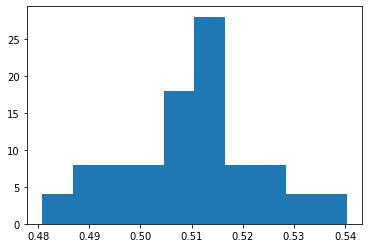

In [47]:
plt.hist(lr.predict_proba(x)[:, 1])

In [48]:
tau = estimate_treatment_effect(lr, x, y, z)
tau

-0.17642358727393698

**Result:** The estimated treatment effect is approximately -0.176, implying that ozone level has a negative causal effect on the asthma crude prevalence. One unit increase in ozone level decrease the asthma prevalence by 0.18.

### 2) Propensity score controlling race and PM2.5

In [49]:
p_race = p_final[p_final['StratificationCategory'] == 'RACE']
p_race = encode_and_bind(p_race, 'Stratification')
p_race = p_race.rename(columns={'Stratification_BLK':'BLK','Stratification_HIS':'HIS',
                                                'Stratification_MRC':'MRC', 'Stratification_OTH':'OTH',
                                                'Stratification_WHT':'WHT'})
p_race.columns

Index(['State', 'StateID', 'StratificationCategory', 'Prevalence_diff',
       'Ozone_diff', 'PM2.5_diff', 'Ozone_treatment', 'BLK', 'HIS', 'MRC',
       'OTH', 'WHT'],
      dtype='object')

In [50]:
p_race_edited = p_race[['Ozone_treatment', 'State', 'StateID', 'StratificationCategory', 'Prevalence_diff',
                        'Ozone_diff', 'PM2.5_diff', 'HIS', 'MRC','OTH', 'WHT']]
p_race_edited = p_race_edited.dropna()
p_race_edited.head()

,Ozone_treatment,State,StateID,StratificationCategory,Prevalence_diff,Ozone_diff,PM2.5_diff,HIS,MRC,OTH,WHT
8,1,Arizona,4,RACE,1.0,-1.231075,-0.395440,1,0,0,0
9,0,Colorado,8,RACE,0.5,-2.866308,0.299333,1,0,0,0
10,1,Connecticut,9,RACE,-0.5,0.411285,-1.051404,0,0,0,1
11,1,California,6,RACE,-0.5,1.963636,0.280536,0,0,0,1
13,1,California,6,RACE,-0.3,1.963636,0.280536,1,0,0,0


In [51]:
y = p_race_edited['Prevalence_diff']
z = p_race_edited['Ozone_treatment']
x = np.array([i.tolist()[-5:] for i in p_race_edited.values], dtype='float')
lr.fit(x, z)

LogisticRegression(max_iter=200, penalty='none', random_state=0)

(array([15., 35., 35., 30.,  5.,  0.,  0.,  0., 10., 16.]),
 array([0.42398193, 0.45344019, 0.48289845, 0.51235671, 0.54181497,
        0.57127323, 0.60073149, 0.63018974, 0.659648  , 0.68910626,
        0.71856452]),
 <BarContainer object of 10 artists>)

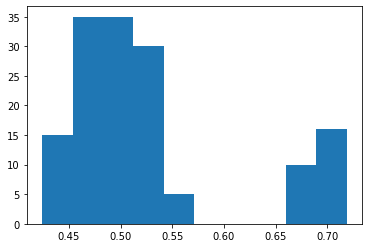

In [52]:
plt.hist(lr.predict_proba(x)[:, 1])

In [53]:
tau = estimate_treatment_effect(lr, x, y, z)
tau

0.17706861292573628

**Result:** The estimated treatment effect is approximately 0.177, implying that ozone level has a positive causal effect on the asthma crude prevalence. One unit increase in ozone level increases the asthma crude prevalence by 0.18.

## Results

Assume unconfoundedness,
1. According to our linear regression model, one unit increase in the ozone level causes crude prevalence to decrease by 0.1
2. According to our Inverse Propensity Weighting method on gender and PM2.5, one unit increase in ozone level decrease the asthma prevalence by 0.18
3. According to our Inverse Propensity Weighting method on race and PM2.5, one unit increase in ozone level increase the asthma prevalence by 0.18

The fact that most of our model suggests that ozone level has a negative causal effect on asthma prevalance seems counterintuitive becuase higher ozone level is irritating to the lungs and airways and therefore is more likely to trigger asthma.\
Therefore, our models are not reliable, primarily because we lack data on other possible confounders such as age/smoking.

## Discussion

Limitations:
1. There may be other confounders such as age/health condition/smoking that may affect the crude prevalence of asthma. However, we don't have these data and therefore can't control for them in our model. This implies that the unconfoundedness assumption may be violated.
2. Gender and race may not be good confounders to be controlled for in this model.
3. Inverse Propensity Weighting may not be a good method to investigate causal relationship between ozone level and asthma prevalence becuase there is no natural treatment group and control group and therefore we have to manually divide the data into two groups.
4. Linear regression model may not be a good model to use in this case because we are not sure that ozone level and asthma prevalence has a linear relationship.

Other data that might be useful:
1. Average age/proportion of participates that smoke to be used as controlled variables in the model
2. Possible instrumental variables for ozone level such as temperate

We are not confident that there is a causal relationship between ozone level and asthma because there are so many confounders that need to be controlled for in order to accurately estimate the causal effect. 

# Research Question 2: Given the selected features, build a model that can predict the crude prevalence of Asthma.

## 1. When control for race, divide the dataset into training and testing set and build models that can predict the crude prevalence of Asthma. 

In [54]:
from sklearn.model_selection import train_test_split

train1, test1 = train_test_split(prevalence_race_onehot, test_size=0.3, random_state=102)

In [55]:
train1.head(5)

,Year,State,StateID,Prevalence,StratificationCategory,PM2.5,Ozone,BLK,HIS,MRC,OTH,WHT
1159,2013,Ohio,39,9.0,RACE,10.490872,37.547077,0,0,0,0,1
1295,2011,District of Columbia,11,6.1,RACE,10.178120,39.612826,0,0,0,0,1
836,2013,Vermont,50,21.3,RACE,7.290938,37.163977,0,0,1,0,0
876,2014,Maine,23,11.5,RACE,7.361436,34.779627,0,0,0,0,1
506,2011,North Carolina,37,4.9,RACE,9.542951,41.932617,0,1,0,0,0


In [56]:
len(test1)

200

## Part A: Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
X = train1[["Ozone", "PM2.5", "BLK","HIS","MRC","OTH","WHT"]]
y = train1["Prevalence"] 
linear_model.fit(X, y)

train1["linear_pred"] = linear_model.predict(X) 
test1["linear_pred"] = linear_model.predict(test1[["Ozone", "PM2.5", "BLK","HIS","MRC","OTH","WHT"]])

In [58]:
train_rmse = np.mean((train1["linear_pred"] - train1["Prevalence"]) ** 2) ** 0.5
test_rmse = np.mean((test1["linear_pred"] - test1["Prevalence"]) ** 2) ** 0.5

print("Training set error for linear model:", train_rmse)
print("Test set error for linear model:    ", test_rmse)

Training set error for linear model: 3.3142883856198058
Test set error for linear model:     3.046966005344222


Linear Regression Model has an acceptable MSE. 

## Part B: Decision Tree

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X,y)

train1["tree_pred"] = tree_model.predict(X) 
test1["tree_pred"] = tree_model.predict(test1[["Ozone", "PM2.5", "BLK","HIS","MRC","OTH","WHT"]])

In [60]:
train_rmse = np.mean((train1["tree_pred"] - train1["Prevalence"]) ** 2) ** 0.5
test_rmse = np.mean((test1["tree_pred"] - test1["Prevalence"]) ** 2) ** 0.5

print("Training set error for decision tree:", train_rmse)
print("Test set error for decision tree:    ", test_rmse)

Training set error for decision tree: 0.0
Test set error for decision tree:     4.274453181402271


As we learned in class, decision tree can reach MSE of 0 for the training set. </br>
Decision Tree also produces an acceptable MSE, yet it's a little worse than linear regression model.

## Part C: Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(max_features=1)
forest_model.fit(X,y) 

train1["forest_pred"] = forest_model.predict(X) 
test1["forest_pred"] = forest_model.predict(test1[["Ozone", "PM2.5", "BLK","HIS","MRC","OTH","WHT"]]) 

In [62]:
train_rmse = np.mean((train1["forest_pred"] - train1["Prevalence"]) ** 2) ** 0.5
test_rmse = np.mean((test1["forest_pred"] - test1["Prevalence"]) ** 2) ** 0.5

print("Training set error for random forest:", train_rmse)
print("Test set error for random forest:    ", test_rmse)

Training set error for random forest: 1.2330501360167945
Test set error for random forest:     3.1077666522761973


Random Forest performs better than decision tree.

## 2. When control for gender, divide the dataset into training and testing set and build models that can predict the crude prevalence of Asthma.

In [63]:
from sklearn.model_selection import train_test_split

train2, test2 = train_test_split(prevalence_gender_onehot, test_size=0.3, random_state=102)

In [64]:
train2.head()

,Year,State,StateID,Prevalence,StratificationCategory,PM2.5,Ozone,Female,Male
1131,2012,Louisiana,22,9.1,GENDER,8.866874,39.085567,1,0
973,2012,Indiana,18,11.1,GENDER,10.748401,39.292039,1,0
991,2014,North Carolina,37,9.7,GENDER,9.201920,38.879455,1,0
1132,2014,West Virginia,54,7.5,GENDER,9.155064,38.087536,0,1
285,2013,Delaware,10,13.3,GENDER,9.012736,38.374770,1,0


## Part A: Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
X = train2[["Ozone", "PM2.5", "Female","Male"]]
y = train2["Prevalence"] 
linear_model.fit(X, y)

train2["linear_pred"] = linear_model.predict(X) 
test2["linear_pred"] = linear_model.predict(test2[["Ozone", "PM2.5", "Female","Male"]])

train_rmse = np.mean((train2["linear_pred"] - train2["Prevalence"]) ** 2) ** 0.5
test_rmse = np.mean((test2["linear_pred"] - test2["Prevalence"]) ** 2) ** 0.5

print("Training set error for linear model:", train_rmse)
print("Test set error for linear model:    ", test_rmse)

Training set error for linear model: 1.3046206768991018
Test set error for linear model:     1.4138118704714557


## Part B: Decision Tree

In [66]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X,y)

train2["tree_pred"] = tree_model.predict(X) 
test2["tree_pred"] = tree_model.predict(test2[["Ozone", "PM2.5", "Female","Male"]])

train_rmse = np.mean((train2["tree_pred"] - train2["Prevalence"]) ** 2) ** 0.5
test_rmse = np.mean((test2["tree_pred"] - test2["Prevalence"]) ** 2) ** 0.5

print("Training set error for decision tree:", train_rmse)
print("Test set error for decision tree:    ", test_rmse)

Training set error for decision tree: 0.0
Test set error for decision tree:     1.8738838485792286


## Part C: Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(max_features=1)
forest_model.fit(X,y) 

train2["forest_pred"] = forest_model.predict(X) 
test2["forest_pred"] = forest_model.predict(test2[["Ozone", "PM2.5", "Female","Male"]]) 

train_rmse = np.mean((train2["forest_pred"] - train2["Prevalence"]) ** 2) ** 0.5
test_rmse = np.mean((test2["forest_pred"] - test2["Prevalence"]) ** 2) ** 0.5

print("Training set error for random forest:", train_rmse)
print("Test set error for random forest:    ", test_rmse)

Training set error for random forest: 0.5268045455357049
Test set error for random forest:     1.5403178656104217


These models all seem to have an acceptable MSE. 